### A simple play with HadISST by Tianxiang Gao

In [1]:
import xarray as xr
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import numpy as np
import urllib

In [2]:
# read HadISST montly data
sst = xr.open_dataset('HadISST_sst.nc')

Text(0.5, 1.0, 'Sea Surface Temperature (SST) Anomaly of Nino3.4 Region, 2020-05')

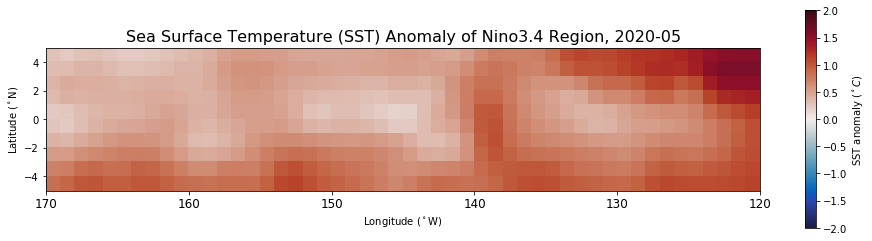

In [3]:
lon0 = -170
lon1 = -120
lat0 = -5
lat1 = 5

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)

# get anomaly from climatology (1981-2010)
clim = sst.sst.sel(time=slice('1981-01-01','2011-01-01')).isel(latitude=slice(lat0+90, lat1+90), longitude=slice(10,60)).mean(axis=0)
data = sst.sst.isel(time=-1,latitude=slice(lat0+90, lat1+90), longitude=slice(10,60))
nino = data - clim
nino.name = 'SST anomaly ($^\circ C$)'


m = nino.plot(cmap=cmo.balance, vmin= -2, vmax=2)
ax.set_aspect('equal')
ax.set_xticklabels([170, 160, 150, 140, 130, 120], fontsize=12)
plt.xlabel(r'Longitude ($^\circ $W)')
plt.ylabel(r'Latitude ($^\circ $N)')
plt.title('Sea Surface Temperature (SST) Anomaly of Nino3.4 Region, ' + str(nino.time.values)[:7], fontsize=16)

### Nino 3.4 Comparison

### Fetch data from NOAA

In [4]:
data = urllib.request.urlopen('https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/nino34.long.anom.data')
noaa = []
for line in data: # files are iterable
    noaa.append(line)
    
noaa = noaa[1:-7]

In [5]:
nino_noaa = []
for line in noaa:
    temp = line.split()
    for month in temp[1:]:
        if float(month) == -99.99:
            pass
        else:
            nino_noaa.append(float(month))
nino_noaa = xr.DataArray(data=nino_noaa)
nino_noaa['dim_0'] = sst.time.values
nino_noaa.rename({'dim_0': 'time'});

### Calculate area weighted anomaly

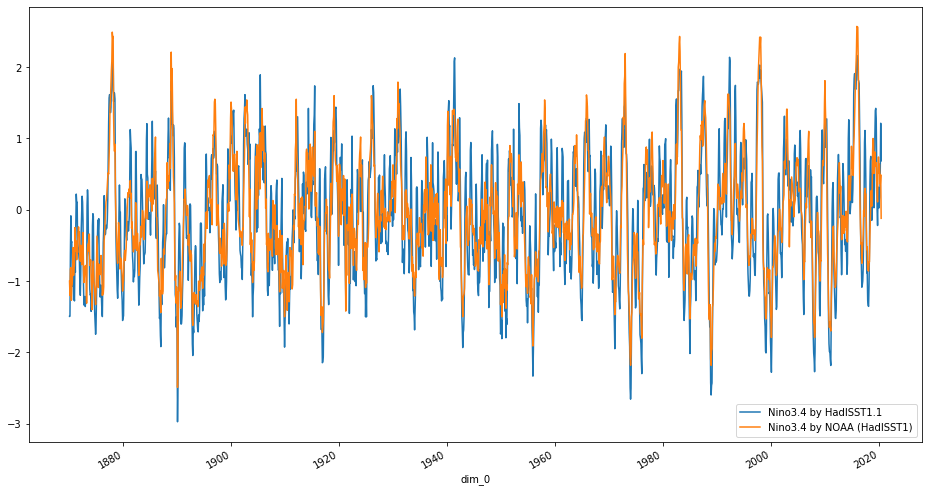

In [6]:
nino_had = ((sst.sst-clim)*np.cos(np.deg2rad(clim.latitude))).mean(axis=1).mean(axis=1)
mappable0 = nino_had.plot(figsize=(16,8))
mappable1 = nino_noaa.plot()
plt.legend(['Nino3.4 by HadISST1.1','Nino3.4 by NOAA (HadISST1)']);